In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT AND PRE-PROCESS DATA #

In [2]:
df_o = pd.read_csv("../Datasets/moocs23-24.csv")
df_o.head()

,Id,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,4,HarvardX,PH207x,2023,Fall,MHxPC130313697,0,0,0,India,...,0.0,7/24/2023,7/27/2024,6,3,197757,0,0,0,23
1,6,HarvardX,PH207x,2023,Fall,MHxPC130237753,1,0,0,United States,...,0.0,7/24/2023,12/24/2023,107,8,7,2,0,0,19
2,7,HarvardX,CS50x,2023,Summer,MHxPC130202970,1,0,0,United States,...,0.0,7/24/2023,3/28/2024,8,1,197757,1,0,0,24
3,20,HarvardX,CS50x,2023,Summer,MHxPC130223941,1,0,0,Other Middle East/Central Asia,...,0.0,7/24/2023,7/15/2024,25,2,197757,4,0,0,20
4,22,HarvardX,PH207x,2023,Fall,MHxPC130317399,0,0,0,Australia,...,0.0,7/24/2023,8/25/2023,3,2,197757,0,0,0,32


In [3]:
len(df_o)

416921

In [4]:
df_o.columns

Index(['Id', 'institute', 'course_id', 'year', 'semester', 'userid_DI',
       'viewed', 'explored', 'certified', 'final_cc_cname_DI', 'LoE_DI',
       'gender', 'grade', 'start_time_DI', 'last_event_DI', 'nevents',
       'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts',
       'incomplete_flag', 'age'],
      dtype='object')

In [5]:
df = df_o.copy()

## Check columns for n/a values ##

In [6]:
df.isna().sum()

Id                       0
institute                0
course_id                0
year                     0
semester                 0
userid_DI                0
viewed                   0
explored                 0
certified                0
final_cc_cname_DI        0
LoE_DI                   0
gender               23211
grade                    0
start_time_DI            0
last_event_DI            0
nevents                  0
ndays_act                0
nplay_video              0
nchapters                0
nforum_posts             0
incomplete_flag          0
age                      0
dtype: int64

In [7]:
print("Percentage of entries that lack gender information: ",format(23211/len(df_o)*100, ".2f"), "%")

Percentage of entries that lack gender information:  5.57 %


Because gender is one key feature of this dataset and because it is the only aspect of the dataset that appears to be missing, it makes sense to remove the rows with missing values in order to reduce the amount of "noise" in the data itself.

In [8]:
# Isolate indices of rows with blank values
df[df["gender"].isna()].index

Int64Index([    13,     14,     15,     88,    132,    174,    175,    176,
               177,    404,
            ...
            416725, 416765, 416779, 416786, 416797, 416809, 416814, 416821,
            416822, 416866],
           dtype='int64', length=23211)

In [9]:
# Drop rows
df = df.drop(df[df["gender"].isna()].index)

In [10]:
df.reset_index()

,index,Id,institute,course_id,year,semester,userid_DI,viewed,explored,certified,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,0,4,HarvardX,PH207x,2023,Fall,MHxPC130313697,0,0,0,...,0.0,7/24/2023,7/27/2024,6,3,197757,0,0,0,23
1,1,6,HarvardX,PH207x,2023,Fall,MHxPC130237753,1,0,0,...,0.0,7/24/2023,12/24/2023,107,8,7,2,0,0,19
2,2,7,HarvardX,CS50x,2023,Summer,MHxPC130202970,1,0,0,...,0.0,7/24/2023,3/28/2024,8,1,197757,1,0,0,24
3,3,20,HarvardX,CS50x,2023,Summer,MHxPC130223941,1,0,0,...,0.0,7/24/2023,7/15/2024,25,2,197757,4,0,0,20
4,4,22,HarvardX,PH207x,2023,Fall,MHxPC130317399,0,0,0,...,0.0,7/24/2023,8/25/2023,3,2,197757,0,0,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393705,416916,583001,MITx,6.002x,2024,Spring,MHxPC130030805,1,0,0,...,0.0,9/7/2024,9/7/2024,29,1,197757,1,0,0,24
393706,416917,583002,MITx,6.00x,2024,Spring,MHxPC130184108,1,0,0,...,0.0,9/7/2024,9/7/2024,97,1,4,2,0,0,22
393707,416918,583003,MITx,6.00x,2024,Spring,MHxPC130359782,0,0,0,...,0.0,9/7/2024,9/7/2024,1,1,197757,0,0,0,22
393708,416919,583004,MITx,6.002x,2024,Spring,MHxPC130098513,0,0,0,...,0.0,9/7/2024,9/7/2024,1,1,197757,0,0,0,34


In [11]:
len(df)

393710

In [12]:
len(set(df["Id"]))

393487

In [13]:
duplicated_entries = df[df.duplicated(subset=["Id"])]
duplicated_entries

,Id,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
786,2022,HarvardX,ER22x,2024,Spring,MHxPC130012400,1,0,0,United States,...,0.0,1/8/2024,3/28/2024,13,3,197757,1,0,0,26
787,2023,HarvardX,PH207x,2023,Fall,MHxPC130012400,1,0,0,United States,...,0.0,7/24/2023,3/16/2024,25,9,1,1,0,0,25
7493,20224,HarvardX,PH207x,2023,Fall,MHxPC130014792,0,0,0,United States,...,0.0,8/12/2023,8/12/2023,4,1,197757,0,0,0,27
7494,20226,HarvardX,CB22x,2024,Spring,MHxPC130262508,1,0,0,Philippines,...,0.0,12/21/2023,4/22/2024,14,1,197757,3,0,0,23
7497,20235,HarvardX,PH207x,2023,Fall,MHxPC130443317,0,0,0,United States,...,0.0,8/12/2023,8/14/2023,3,2,197757,0,0,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408066,572023,MITx,8.MReV,2024,Summer,MHxPC130106847,0,0,0,India,...,0.0,8/6/2024,8/6/2024,2,1,197757,0,0,0,25
408067,572024,MITx,6.00x,2024,Spring,MHxPC130450735,1,0,0,Russian Federation,...,0.0,8/3/2024,9/6/2024,740,11,86,4,0,0,31
416180,582022,MITx,6.00x,2024,Spring,MHxPC130551092,0,0,0,United States,...,0.0,9/3/2024,9/3/2024,1,1,197757,0,0,0,20
416181,582023,MITx,6.00x,2024,Spring,MHxPC130130490,0,0,0,Other Africa,...,0.0,9/3/2024,9/3/2024,2,1,197757,0,0,0,30


In [14]:
# for student_id in duplicated_entries["Id"]:
#     print(df[df["Id"]==student_id])

In [15]:
len(set(duplicated_entries["Id"]))

223

In [16]:
set(df["LoE_DI"])

{"Bachelor's", 'Doctorate', 'Less than Secondary', "Master's", 'Secondary'}

In [17]:
set(df["final_cc_cname_DI"])

{'Australia',
 'Bangladesh',
 'Brazil',
 'Canada',
 'China',
 'Colombia',
 'Egypt',
 'France',
 'Germany',
 'Greece',
 'India',
 'Indonesia',
 'Japan',
 'Mexico',
 'Morocco',
 'Nigeria',
 'Other Africa',
 'Other East Asia',
 'Other Europe',
 'Other Middle East/Central Asia',
 'Other North & Central Amer., Caribbean',
 'Other Oceania',
 'Other South America',
 'Other South Asia',
 'Pakistan',
 'Philippines',
 'Poland',
 'Portugal',
 'Russian Federation',
 'Spain',
 'Ukraine',
 'United Kingdom',
 'United States',
 'Unknown/Other'}

<AxesSubplot:xlabel='final_cc_cname_DI', ylabel='Count'>

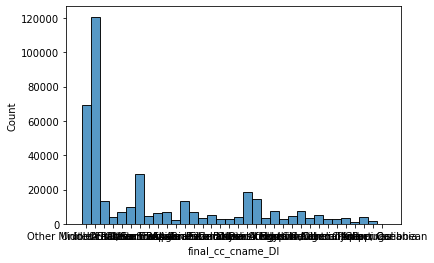

In [18]:
sns.histplot(df["final_cc_cname_DI"])

<AxesSubplot:xlabel='age', ylabel='Count'>

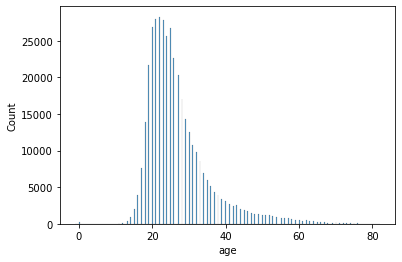

In [19]:
sns.histplot(df["age"])

<AxesSubplot:xlabel='course_id', ylabel='Count'>

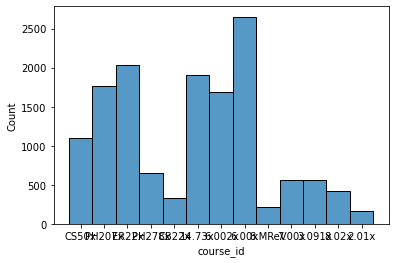

In [20]:
sns.histplot(df[df["certified"]==1], x="course_id")

In [21]:
df[df["certified"]==1]

,Id,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
25,51,HarvardX,CS50x,2023,Summer,MHxPC130320562,1,1,1,Other Europe,...,1.00,7/24/2023,5/6/2024,691,59,197757,12,0,0,29
123,290,HarvardX,CS50x,2023,Fall,MHxPC130574671,1,1,1,Egypt,...,1.00,10/16/2023,6/20/2024,219,59,197757,12,0,0,17
206,487,HarvardX,CS50x,2023,Fall,MHxPC130158860,1,1,1,India,...,1.00,10/14/2023,5/17/2024,28,15,197757,12,0,0,21
215,507,HarvardX,CS50x,2023,Summer,MHxPC130153716,1,1,1,Pakistan,...,1.00,7/24/2023,5/9/2024,295,44,197757,12,0,0,21
229,536,HarvardX,CS50x,2023,Summer,MHxPC130285816,1,1,1,Russian Federation,...,1.00,7/24/2023,5/20/2024,216,30,197757,12,0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406080,569637,MITx,8.MReV,2024,Summer,MHxPC130141567,1,1,1,Indonesia,...,0.93,6/19/2024,9/5/2024,10099,55,123,40,0,0,16
406089,569647,MITx,8.MReV,2024,Summer,MHxPC130016604,1,0,1,Other South Asia,...,0.61,6/19/2024,8/1/2024,2998,14,1,24,0,0,17
406129,569691,MITx,8.MReV,2024,Summer,MHxPC130175757,1,1,1,India,...,0.67,6/19/2024,9/1/2024,11091,33,36,43,0,0,21
406516,570147,MITx,8.MReV,2024,Summer,MHxPC130418138,1,1,1,India,...,0.75,6/23/2024,8/18/2024,3012,12,197757,27,0,0,16


In [22]:
df = df.drop(["year", "semester", "start_time_DI", "last_event_DI","viewed","grade","start_time_DI","explored","last_event_DI","nevents","ndays_act","nplay_video", "nchapters", "nforum_posts","incomplete_flag"], axis=1)

In [23]:
df

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,gender,age
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,m,23
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,m,19
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,m,24
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,m,20
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,f,32
...,...,...,...,...,...,...,...,...,...
416916,583001,MITx,6.002x,MHxPC130030805,0,Pakistan,Master's,m,24
416917,583002,MITx,6.00x,MHxPC130184108,0,Canada,Bachelor's,m,22
416918,583003,MITx,6.00x,MHxPC130359782,0,Other Europe,Bachelor's,f,22
416919,583004,MITx,6.002x,MHxPC130098513,0,United States,Doctorate,m,34


# TRANSFORM CATEGORIAL INFORMATION TO ONE-HOT ENCODING #

## GENDER ##

In [24]:
# https://www.geeksforgeeks.org/python/using-apply-in-pandas-lambda-functions-with-multiple-if-statements/

df["gender_numerical"] = df["gender"].apply(lambda x: 1 if x=='m' else 0)

In [25]:
df = df.drop(["gender"], axis=1)

In [26]:
df

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,23,1
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,19,1
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,24,1
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,20,1
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,32,0
...,...,...,...,...,...,...,...,...,...
416916,583001,MITx,6.002x,MHxPC130030805,0,Pakistan,Master's,24,1
416917,583002,MITx,6.00x,MHxPC130184108,0,Canada,Bachelor's,22,1
416918,583003,MITx,6.00x,MHxPC130359782,0,Other Europe,Bachelor's,22,0
416919,583004,MITx,6.002x,MHxPC130098513,0,United States,Doctorate,34,1


## AGE ##

In [27]:
# https://www.geeksforgeeks.org/python/using-apply-in-pandas-lambda-functions-with-multiple-if-statements/
# Set age brackets
df["age_indicator"] = df["age"].apply(lambda x: 0 if x<=17 else (
                                                        1 if x>17 and x<=35 else (
                                                        2 if x>35 and x<60 else 4)))

In [28]:
# Produce age dummies
age_dummies = pd.get_dummies(df["age_indicator"], prefix="age_indicator")
age_dummies

,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
416916,0,1,0,0
416917,0,1,0,0
416918,0,1,0,0
416919,0,1,0,0


In [29]:
# Concatenate dummies to original df
df = pd.concat([df, age_dummies], axis=1)
df.head()

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,23,1,1,0,1,0,0
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,19,1,1,0,1,0,0
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,24,1,1,0,1,0,0
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,20,1,1,0,1,0,0
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,32,0,1,0,1,0,0


## LEVEL OF EDUCATION ##

In [30]:
# Generate dummies
LoE_dummies = pd.get_dummies(df["LoE_DI"], prefix="education")
LoE_dummies

,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,education_Secondary
0,1,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,0,1,0
...,...,...,...,...,...
416916,0,0,0,1,0
416917,1,0,0,0,0
416918,1,0,0,0,0
416919,0,1,0,0,0


In [31]:
# # Concatenate educational econding to original df
df = pd.concat([df, LoE_dummies], axis=1)
df.head()

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,education_Secondary
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,23,1,1,0,1,0,0,1,0,0,0,0
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,19,1,1,0,1,0,0,0,0,0,0,1
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,24,1,1,0,1,0,0,1,0,0,0,0
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,20,1,1,0,1,0,0,0,0,0,0,1
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,32,0,1,0,1,0,0,0,0,0,1,0


## REGIONAL INFORMATION ##

In [32]:
# Get regional information dummies
reg_dummies = pd.get_dummies(df["final_cc_cname_DI"], prefix="region")
reg_dummies

,region_Australia,region_Bangladesh,region_Brazil,region_Canada,region_China,region_Colombia,region_Egypt,region_France,region_Germany,region_Greece,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416916,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
416917,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
416918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
416919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
# # Concatenate regional econding to original df
df = pd.concat([df, reg_dummies], axis=1)
df.head()

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,23,1,1,...,0,0,0,0,0,0,0,0,0,0
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,19,1,1,...,0,0,0,0,0,0,0,0,1,0
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,24,1,1,...,0,0,0,0,0,0,0,0,1,0
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,20,1,1,...,0,0,0,0,0,0,0,0,0,0
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,32,0,1,...,0,0,0,0,0,0,0,0,0,0


## DROP ORIGINAL COLUMNS ##

In [34]:
# df_final = pd.concat([df, age_dummies, LoE_dummies, reg_dummies], axis=1)

In [35]:
# df_final

In [36]:
# # Make a copy of the processed dataset before dropping columns
df_final = df.copy()

In [37]:
df_final = df_final.drop(["final_cc_cname_DI", "LoE_DI","age","age_indicator"], axis=1)

In [38]:
df_final.head()

,Id,institute,course_id,userid_DI,certified,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
0,4,HarvardX,PH207x,MHxPC130313697,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,HarvardX,PH207x,MHxPC130237753,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7,HarvardX,CS50x,MHxPC130202970,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,20,HarvardX,CS50x,MHxPC130223941,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,HarvardX,PH207x,MHxPC130317399,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_final.columns

Index(['Id', 'institute', 'course_id', 'userid_DI', 'certified',
       'gender_numerical', 'age_indicator_0', 'age_indicator_1',
       'age_indicator_2', 'age_indicator_4', 'education_Bachelor's',
       'education_Doctorate', 'education_Less than Secondary',
       'education_Master's', 'education_Secondary', 'region_Australia',
       'region_Bangladesh', 'region_Brazil', 'region_Canada', 'region_China',
       'region_Colombia', 'region_Egypt', 'region_France', 'region_Germany',
       'region_Greece', 'region_India', 'region_Indonesia', 'region_Japan',
       'region_Mexico', 'region_Morocco', 'region_Nigeria',
       'region_Other Africa', 'region_Other East Asia', 'region_Other Europe',
       'region_Other Middle East/Central Asia',
       'region_Other North & Central Amer., Caribbean', 'region_Other Oceania',
       'region_Other South America', 'region_Other South Asia',
       'region_Pakistan', 'region_Philippines', 'region_Poland',
       'region_Portugal', 'region_Russi

# TRAIN-TEST SPLIT #

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# Split into training and testing data
# I am not filtering out users who are taking multiple courses because those themselves would give us an opportunity to see whether users are matched/clustered correctly

train_df_o, test_df_o = train_test_split(df, test_size=0.2, random_state=7,stratify=df["course_id"])

In [66]:
len(train_df_o)

314968

In [67]:
len(test_df_o)

78742

In [68]:
len(test_df_o["userid_DI"].unique())

74841

In [69]:
# isolate which user id is not unique
test_df_o[test_df_o.duplicated(subset=["userid_DI"])]

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
377707,539645,MITx,6.00x,MHxPC130211185,0,Other Africa,Secondary,26,1,1,...,0,0,0,0,0,0,0,0,0,0
364805,526402,MITx,6.002x,MHxPC130514657,0,Portugal,Secondary,20,1,1,...,0,0,0,1,0,0,0,0,0,0
71103,183377,HarvardX,PH278x,MHxPC130143930,0,Other Middle East/Central Asia,Bachelor's,28,0,1,...,0,0,0,0,0,0,0,0,0,0
83504,209060,HarvardX,ER22x,MHxPC130187514,0,Other Europe,Secondary,20,1,1,...,0,0,0,0,0,0,0,0,0,0
92604,224036,HarvardX,ER22x,MHxPC130120756,0,Other Europe,Doctorate,31,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15744,45615,HarvardX,CS50x,MHxPC130592584,0,Other Europe,Master's,31,1,1,...,0,0,0,0,0,0,0,0,0,0
15081,43544,HarvardX,CB22x,MHxPC130149513,0,India,Secondary,22,0,1,...,0,0,0,0,0,0,0,0,0,0
304883,457684,MITx,6.002x,MHxPC130301752,1,Other Europe,Master's,27,1,1,...,0,0,0,0,0,0,0,0,0,0
288856,440721,MITx,6.002x,MHxPC130043569,0,Other Middle East/Central Asia,Bachelor's,28,1,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
train_df_o[train_df_o.duplicated(subset=["userid_DI"])]

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
85783,213290,HarvardX,CB22x,MHxPC130047152,0,Unknown/Other,Secondary,25,1,1,...,0,0,0,0,0,0,0,0,0,1
177733,319924,MITx,6.00x,MHxPC130289074,0,"Other North & Central Amer., Caribbean",Secondary,23,1,1,...,0,0,0,0,0,0,0,0,0,0
43845,119512,HarvardX,PH278x,MHxPC130374631,0,United States,Bachelor's,27,0,1,...,0,0,0,0,0,0,0,0,1,0
358288,518966,MITx,8.02x,MHxPC130187664,0,Brazil,Secondary,27,1,1,...,0,0,0,0,0,0,0,0,0,0
204735,349546,MITx,8.02x,MHxPC130592811,0,India,Secondary,21,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316747,470567,MITx,14.73x,MHxPC130448406,0,Other Europe,Secondary,25,0,1,...,0,0,0,0,0,0,0,0,0,0
79772,201404,HarvardX,CB22x,MHxPC130462452,0,United States,Secondary,20,1,1,...,0,0,0,0,0,0,0,0,1,0
192915,336496,MITx,6.00x,MHxPC130014017,0,United States,Bachelor's,24,0,1,...,0,0,0,0,0,0,0,0,1,0
86271,214176,HarvardX,ER22x,MHxPC130004533,0,Brazil,Secondary,24,1,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:
overlap_users = []

a = set(test_df_o["userid_DI"])
b = set(train_df_o["userid_DI"])

for userid in a:
    if userid in b:
        overlap_users.append(userid)
        
len(overlap_users)

20487

In [72]:
overlap_users

['MHxPC130169782',
 'MHxPC130553274',
 'MHxPC130095784',
 'MHxPC130436533',
 'MHxPC130119605',
 'MHxPC130497140',
 'MHxPC130329158',
 'MHxPC130385983',
 'MHxPC130349439',
 'MHxPC130425159',
 'MHxPC130081315',
 'MHxPC130568456',
 'MHxPC130002937',
 'MHxPC130026570',
 'MHxPC130114729',
 'MHxPC130039697',
 'MHxPC130527185',
 'MHxPC130405674',
 'MHxPC130159144',
 'MHxPC130538310',
 'MHxPC130414766',
 'MHxPC130130382',
 'MHxPC130444193',
 'MHxPC130451569',
 'MHxPC130137472',
 'MHxPC130163493',
 'MHxPC130235695',
 'MHxPC130048684',
 'MHxPC130228074',
 'MHxPC130284494',
 'MHxPC130137274',
 'MHxPC130396030',
 'MHxPC130105930',
 'MHxPC130300923',
 'MHxPC130377568',
 'MHxPC130381908',
 'MHxPC130492198',
 'MHxPC130238987',
 'MHxPC130382725',
 'MHxPC130505405',
 'MHxPC130275462',
 'MHxPC130068531',
 'MHxPC130460129',
 'MHxPC130100894',
 'MHxPC130474417',
 'MHxPC130159591',
 'MHxPC130273591',
 'MHxPC130525089',
 'MHxPC130149321',
 'MHxPC130382934',
 'MHxPC130063535',
 'MHxPC130199199',
 'MHxPC13053

In [73]:
overlap_users2 = [user_id for user_id in a if user_id in b]

In [74]:
len(overlap_users2)

20487

In [75]:
# https://stackoverflow.com/questions/3170055/test-if-lists-share-any-items-in-python
# bool(set(test_df["userid_DI"]) & set(train_df["userid_DI"]))
# any(i in set(test_df["userid_DI"]) for i in set(train_df["userid_DI"]))

## K-means clustering ##

In [76]:
# K-means clustering
# https://lisalondon.medium.com/applying-k-means-clustering-model-to-customer-segmentation-4254386c7563
# https://www.youtube.com/watch?v=afPJeQuVeuY
# https://www.youtube.com/watch?v=ZzJ13-6kCAY
# https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb


# perhaps think about number of clusters in relation to size of the dataset, such that each cluster has a certain number
#  of users. perhaps this measure as a way of delineating the values of k that will be tested

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [445]:
train_df = train_df_o.copy()

In [446]:
train_df.columns

Index(['Id', 'institute', 'course_id', 'userid_DI', 'certified',
       'final_cc_cname_DI', 'LoE_DI', 'age', 'gender_numerical',
       'age_indicator', 'age_indicator_0', 'age_indicator_1',
       'age_indicator_2', 'age_indicator_4', 'education_Bachelor's',
       'education_Doctorate', 'education_Less than Secondary',
       'education_Master's', 'education_Secondary', 'region_Australia',
       'region_Bangladesh', 'region_Brazil', 'region_Canada', 'region_China',
       'region_Colombia', 'region_Egypt', 'region_France', 'region_Germany',
       'region_Greece', 'region_India', 'region_Indonesia', 'region_Japan',
       'region_Mexico', 'region_Morocco', 'region_Nigeria',
       'region_Other Africa', 'region_Other East Asia', 'region_Other Europe',
       'region_Other Middle East/Central Asia',
       'region_Other North & Central Amer., Caribbean', 'region_Other Oceania',
       'region_Other South America', 'region_Other South Asia',
       'region_Pakistan', 'region_Philippi

In [447]:
# ??????????????????????? consider if to remove certified ???????????????????????
# afterthought: remove certified because it is not something that would belong to a new user
#    --> the certified element should come into play when sorting recommendations and should be part of those functions
train_df = train_df.drop(["Id", "institute","course_id","certified","final_cc_cname_DI", "LoE_DI", "age", "age_indicator"], axis=1) # LEAVE USER ID IN

In [448]:
train_df.columns

Index(['userid_DI', 'gender_numerical', 'age_indicator_0', 'age_indicator_1',
       'age_indicator_2', 'age_indicator_4', 'education_Bachelor's',
       'education_Doctorate', 'education_Less than Secondary',
       'education_Master's', 'education_Secondary', 'region_Australia',
       'region_Bangladesh', 'region_Brazil', 'region_Canada', 'region_China',
       'region_Colombia', 'region_Egypt', 'region_France', 'region_Germany',
       'region_Greece', 'region_India', 'region_Indonesia', 'region_Japan',
       'region_Mexico', 'region_Morocco', 'region_Nigeria',
       'region_Other Africa', 'region_Other East Asia', 'region_Other Europe',
       'region_Other Middle East/Central Asia',
       'region_Other North & Central Amer., Caribbean', 'region_Other Oceania',
       'region_Other South America', 'region_Other South Asia',
       'region_Pakistan', 'region_Philippines', 'region_Poland',
       'region_Portugal', 'region_Russian Federation', 'region_Spain',
       'region_Ukrai

In [449]:
train_df

,userid_DI,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
172274,MHxPC130179854,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
123079,MHxPC130578291,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117245,MHxPC130427709,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53223,MHxPC130393398,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
349370,MHxPC130212319,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163538,MHxPC130346920,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178860,MHxPC130442906,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
130707,MHxPC130066864,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
129481,MHxPC130249189,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# useless given 0s and 1s

# sns.pairplot(train_df)

## Elbow Method ##

In [84]:
# max_k = 100
# min_k = 5
# inertia = []
# k_values = range(min_k, max_k+1)

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=7, max_iter=1000)
    
#     kmeans.fit_predict(train_df)
#     inertia.append(kmeans.inertia_)



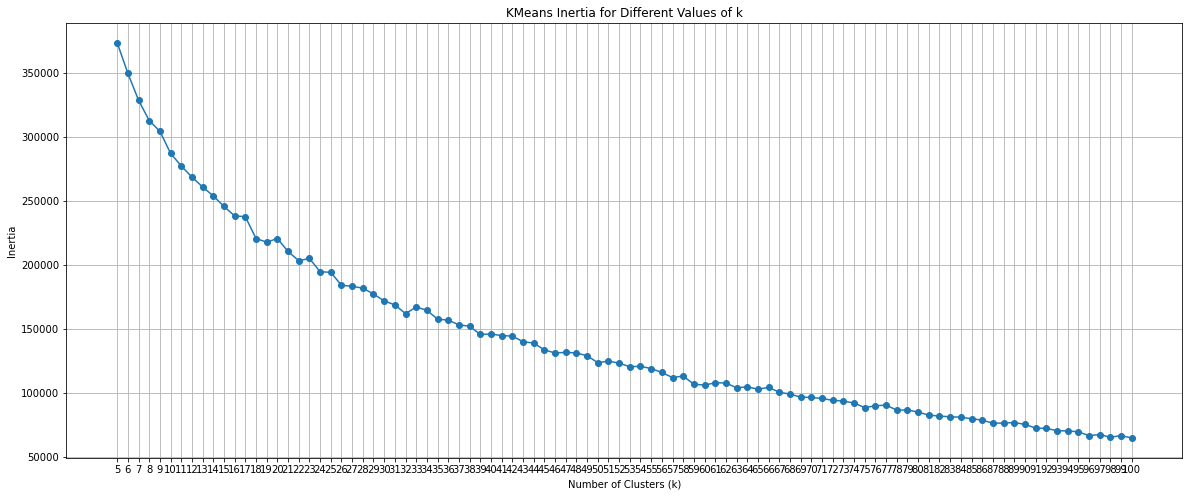

In [309]:
# 5<=k<=100

# plt.figure(figsize=(20,8))
# plt.plot(k_values, inertia, marker='o')
# plt.title('KMeans Inertia for Different Values of k')
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Inertia")
# plt.xticks(k_values)
# plt.grid(True)
# plt.show()

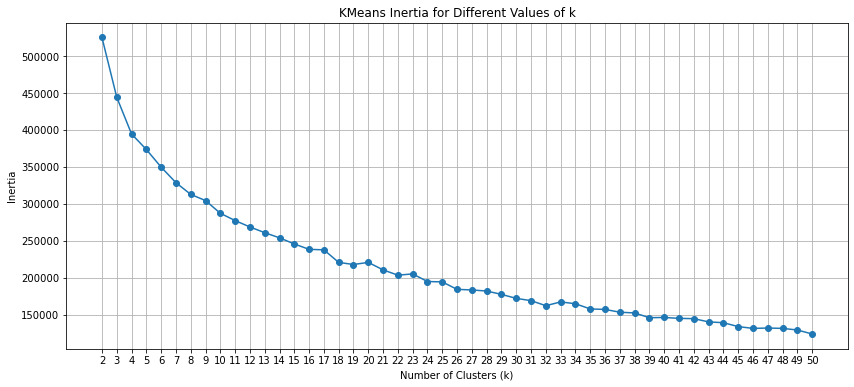

In [305]:
# 2<=k<=50

# plt.figure(figsize=(14,6))
# plt.plot(k_values, inertia, marker='o')
# plt.title('KMeans Inertia for Different Values of k')
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Inertia")
# plt.xticks(k_values)
# plt.grid(True)
# plt.show()

## Elbow + Silhouette Score ##

In [87]:
max_k = 75
min_k = 5
inertia = []
silhouette_scores = []
k_values = range(min_k, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=7)
    
    cluster_labels = kmeans.fit_predict(train_df)
    inertia.append(kmeans.inertia_)
    
    if (k == 32 or k == 75):
    
        

        sil_score = silhouette_score(train_df, cluster_labels)

        silhouette_scores.append(sil_score)
    



In [91]:
s_scores = []

for i in range(5,76):
    if (i == 32):
        s_scores.append(silhouette_scores[0])
    elif (i==75):
        s_scores.append(silhouette_scores[1])
    else:
        s_scores.append(0)
        

In [90]:
silhouette_scores

[0.4919715764358467, 0.6917888760553635]

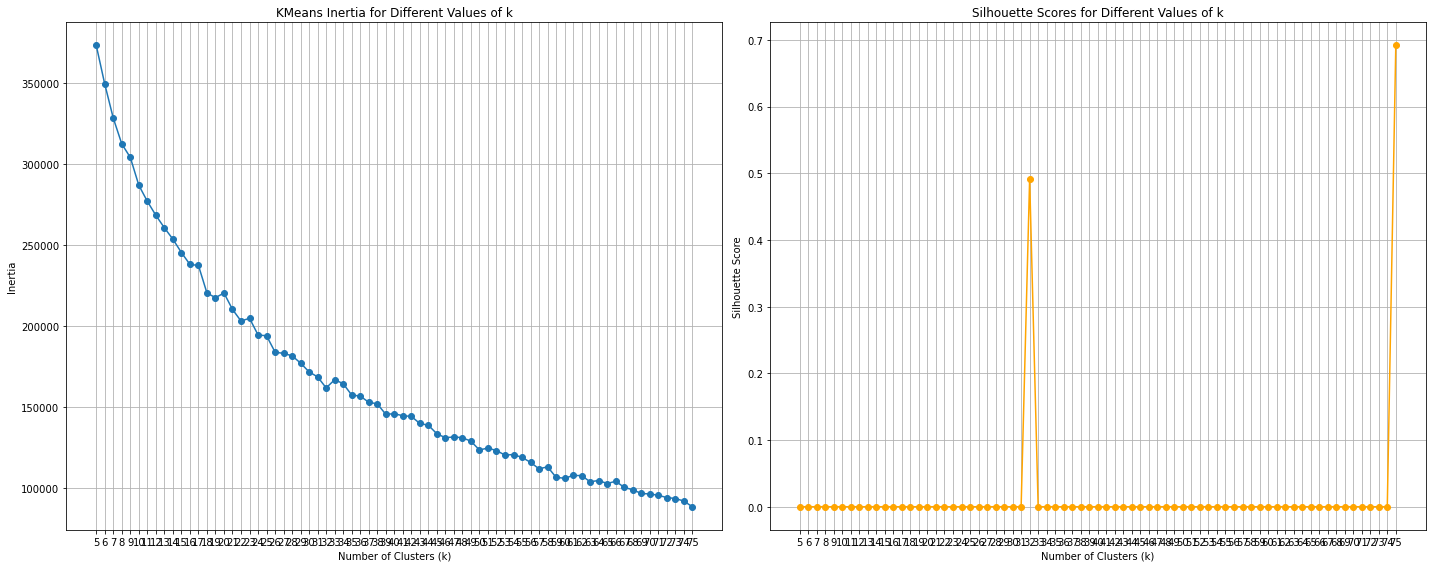

In [92]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, s_scores, marker='o', color="orange")
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

## Run Kmeans with k=75 ##

In [462]:
# Create clusters and store labels
kmeans = KMeans(n_clusters=75, max_iter = 1000, random_state=7)
cluster_labels = kmeans.fit_predict(train_df.iloc[:,1:]) # disregard user_id
    


In [463]:
cluster_labels

array([64, 74, 10, ...,  6, 24, 47], dtype=int32)

<AxesSubplot:ylabel='Count'>

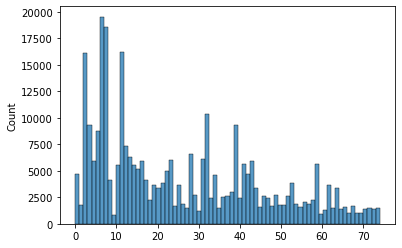

In [464]:
sns.histplot(cluster_labels)

In [465]:
kmeans.cluster_centers_

array([[-2.66453526e-15,  2.10970464e-03,  9.97890295e-01, ...,
        -4.64905892e-16,  1.00000000e+00,  1.26634814e-16],
       [ 6.54575893e-01, -7.63278329e-17,  1.00000000e+00, ...,
         4.16333634e-17, -5.55111512e-17, -4.33680869e-17],
       [ 1.00000000e+00, -9.43689571e-16,  9.93043046e-01, ...,
         1.34614542e-15,  1.00000000e+00,  3.12250226e-16],
       ...,
       [ 6.93219223e-01, -1.17961196e-16,  1.00000000e+00, ...,
         8.32667268e-17, -5.55111512e-17, -3.64291930e-17],
       [ 8.15884477e-01, -9.71445147e-17,  1.00000000e+00, ...,
         9.02056208e-17, -5.55111512e-17, -3.81639165e-17],
       [ 8.22485207e-01, -1.24900090e-16,  1.00000000e+00, ...,
         8.32667268e-17, -5.55111512e-17, -3.98986399e-17]])

In [466]:
train_df["clusters"] = cluster_labels

In [467]:
train_df.head()

,userid_DI,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,...,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other,clusters
172274,MHxPC130179854,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,64
123079,MHxPC130578291,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,74
117245,MHxPC130427709,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
53223,MHxPC130393398,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,32
349370,MHxPC130212319,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,58


## Get prediction on test data ##

In [481]:
test_df = test_df_o.copy()

In [482]:
test_df = test_df.drop(["Id", "institute", "course_id", "userid_DI", "certified", "final_cc_cname_DI", "LoE_DI", "age", "age_indicator"], axis=1) # for the moment, do not preserve user_id

In [484]:
predicted_labels = kmeans.predict(test_df)
predicted_labels

array([ 7, 43, 37, ...,  2,  6, 11], dtype=int32)

In [488]:
test_df["clusters"] = predicted_labels

In [490]:
np.array([test_df.iloc[0,:-1].values])

array([[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [491]:
np.array([test_df.iloc[0,:-1]])

array([[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [492]:
s = np.array(test_df.iloc[0,:-1]).reshape(1,-1)
s

array([[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [493]:
kmeans.predict([test_df.iloc[0,:-1].values])

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([7], dtype=int32)

<AxesSubplot:ylabel='Count'>

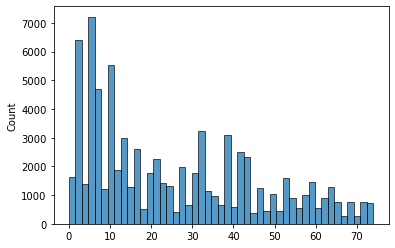

In [494]:
sns.histplot(predicted_labels)

In [502]:
test_df["clusters"]

391791     7
54637     43
248684    37
210927    39
108719    13
          ..
101984    62
205957    12
62381      2
16962      6
329709    11
Name: clusters, Length: 78742, dtype: int32

In [495]:
test_df.iloc[0,-1:]

clusters    7
Name: 391791, dtype: int64

In [496]:
test_df.columns

Index(['gender_numerical', 'age_indicator_0', 'age_indicator_1',
       'age_indicator_2', 'age_indicator_4', 'education_Bachelor's',
       'education_Doctorate', 'education_Less than Secondary',
       'education_Master's', 'education_Secondary', 'region_Australia',
       'region_Bangladesh', 'region_Brazil', 'region_Canada', 'region_China',
       'region_Colombia', 'region_Egypt', 'region_France', 'region_Germany',
       'region_Greece', 'region_India', 'region_Indonesia', 'region_Japan',
       'region_Mexico', 'region_Morocco', 'region_Nigeria',
       'region_Other Africa', 'region_Other East Asia', 'region_Other Europe',
       'region_Other Middle East/Central Asia',
       'region_Other North & Central Amer., Caribbean', 'region_Other Oceania',
       'region_Other South America', 'region_Other South Asia',
       'region_Pakistan', 'region_Philippines', 'region_Poland',
       'region_Portugal', 'region_Russian Federation', 'region_Spain',
       'region_Ukraine', 'region_

## Measure distance for a certain test point ##

In [233]:
from sklearn.metrics.pairwise import cosine_similarity

In [498]:
np.array((test_df.iloc[1,:-1])).reshape(1, -1)

array([[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [517]:
# Define function to isolate top n closest datapoints in the appropriate cluster for every record


def get_cluster (user_vector, estimator=kmeans):
    '''
        Funcion that takes a vector containing demographic data from a user and returns the predicted cluster for that user
    '''
    
    return estimator.predict(user_vector)[0]

def get_user_distances (user_vector, df=train_df):
    '''
        Function that takes a user vector containing demographic information and returns the distances from every user in the cluster to the test user
        
        Inputs:
            - user_vector : vector denoting user featuers
            -    df       : dataframe containing users and cluster information
            
        Output:
            - sorted_indices : list of indices, sorted in reverse order, denoting the cosine distances from the test users to other users in the cluster
            -   df_subset    : return the subset of the dataframe containing the cluster for future calculations
        
    '''
    
    # Get cluster number
    cluster_num = get_cluster(user_vector)
    
    # Isolate all items in the cluster
    df_subset = df[df["clusters"]==cluster_num]
    
    # Calculate cosine distances from the test user to each user in the cluster ignoring cluster information included in dataframe
    cosine_distances = cosine_similarity(user_vector, df_subset.iloc[:,1:-1])[0] # unest array
    
    # Sort distances in reverse order
    sorted_indices = np.argsort(cosine_distances)[::-1]
    
    return sorted_indices, df_subset
    
    
def get_top_n_recommendations(user_vector, df=train_df):
    
    # Calculate all distances from a new user to the rest of the records in that cluster
    sorted_distances, cluster = get_user_distances(user_vector, df)
    
    
    
    return sorted_distances, cluster

    

In [554]:
train_df.head()

,userid_DI,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,...,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other,clusters
172274,MHxPC130179854,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,64
123079,MHxPC130578291,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,74
117245,MHxPC130427709,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
53223,MHxPC130393398,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,32
349370,MHxPC130212319,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,58


In [512]:
test_user = np.array(test_df.iloc[1, :-1]).reshape(1,-1)

In [557]:
s, c = get_user_distances(test_user)

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [575]:
s

array([5952, 2657, 4531, ..., 5821, 2061, 2202])

In [573]:
len(c)

5953

In [576]:
s

array([5952, 2657, 4531, ..., 5821, 2061, 2202])

In [583]:
# Get user ids for sorted list

user_ids = [c.iloc[s[i],0] for i in range(len(s))]
len(user_ids)

5953

In [587]:
train_df_o

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
172274,311670,HarvardX,CS50x,MHxPC130179854,0,United States,Secondary,55,1,2,...,0,0,0,0,0,0,0,0,1,0
123079,258176,HarvardX,ER22x,MHxPC130578291,0,Mexico,Bachelor's,24,1,1,...,0,0,0,0,0,0,0,0,0,0
117245,252077,HarvardX,CB22x,MHxPC130427709,0,Other Europe,Secondary,33,1,1,...,0,0,0,0,0,0,0,0,0,0
53223,139996,HarvardX,PH278x,MHxPC130393398,0,United States,Bachelor's,29,0,1,...,0,0,0,0,0,0,0,0,1,0
349370,508570,MITx,6.00x,MHxPC130212319,0,Spain,Master's,27,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163538,301548,HarvardX,ER22x,MHxPC130346920,0,Colombia,Bachelor's,22,0,1,...,0,0,0,0,0,0,0,0,0,0
178860,321164,MITx,6.00x,MHxPC130442906,0,United Kingdom,Secondary,27,1,1,...,0,0,0,0,0,0,0,1,0,0
130707,266110,HarvardX,CS50x,MHxPC130066864,0,United States,Bachelor's,24,1,1,...,0,0,0,0,0,0,0,0,1,0
129481,264825,HarvardX,CS50x,MHxPC130249189,0,Other Middle East/Central Asia,Less than Secondary,16,1,0,...,0,0,0,0,0,0,0,0,0,0


In [610]:
train_df_o[train_df_o["userid_DI"]==user_ids[5]]

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
80050,202050,HarvardX,PH278x,MHxPC130541758,0,Indonesia,Bachelor's,22,0,1,...,0,0,0,0,0,0,0,0,0,0


In [674]:
for i in range(len(user_ids)):
    row = pt[pt.index==user_ids[i]]
    if (1 in row.values):
        c = np.where(r == 1.)
        if (len(c) > 1):
            print(i)

In [662]:
r = pt[pt.index==user_ids[319]].values[0]
r

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,  0.])

In [663]:
len(np.where(r == 1.))

1

In [669]:
pt.columns

Index(['14.73x', '2.01x', '3.091x', '6.002x', '6.00x', '7.00x', '8.02x',
       '8.MReV', 'CB22x', 'CS50x', 'ER22x', 'PH207x', 'PH278x'],
      dtype='object', name='course_id')

In [678]:
st = set()
st.add(1)
st.add(2)
st.add(1)
len(st)

2

In [572]:
# check users
cosine_similarity(test_user, np.array(c.iloc[s[300:500],1:-1]))

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.66666667, 0.66

In [560]:
c.iloc[5952]

userid_DI                                        MHxPC130314059
gender_numerical                                              0
age_indicator_0                                               0
age_indicator_1                                               1
age_indicator_2                                               0
age_indicator_4                                               0
education_Bachelor's                                          1
education_Doctorate                                           0
education_Less than Secondary                                 0
education_Master's                                            0
education_Secondary                                           0
region_Australia                                              0
region_Bangladesh                                             0
region_Brazil                                                 0
region_Canada                                                 0
region_China                            

In [513]:
get_cluster(test_user)

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


43

In [518]:
s,c = get_top_n_recommendations(test_user)

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [529]:
s

array([5952, 2657, 4531, ..., 5821, 2061, 2202])

In [535]:
c.iloc[2202]

userid_DI                                        MHxPC130207030
gender_numerical                                              0
age_indicator_0                                               1
age_indicator_1                                               0
age_indicator_2                                               0
age_indicator_4                                               0
education_Bachelor's                                          1
education_Doctorate                                           0
education_Less than Secondary                                 0
education_Master's                                            0
education_Secondary                                           0
region_Australia                                              0
region_Bangladesh                                             0
region_Brazil                                                 0
region_Canada                                                 0
region_China                            

In [533]:
c.iloc[s[2]]

userid_DI                                        MHxPC130530061
gender_numerical                                              0
age_indicator_0                                               0
age_indicator_1                                               1
age_indicator_2                                               0
age_indicator_4                                               0
education_Bachelor's                                          1
education_Doctorate                                           0
education_Less than Secondary                                 0
education_Master's                                            0
education_Secondary                                           0
region_Australia                                              0
region_Bangladesh                                             0
region_Brazil                                                 0
region_Canada                                                 0
region_China                            

In [431]:
test_user = np.asarray(test_df.iloc[1,:-1]).reshape(1,-1)
test_user

array([[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

## attempt a test ##

In [274]:
cosine_similarity(test_user, [df_t.iloc[0,:-1]])

array([[0.8660254]])

In [500]:
get_cluster(np.asarray(test_df.iloc[1,:-1]).reshape(1,-1))

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


60

In [225]:
df_t = top_n_nearest_users(test_user)

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [505]:
a, b = get_top_n_recommendations(test_user)

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [433]:
a

array([1121,  743,  726, ...,  653,  652,    0])

In [439]:
b.index[1121]

302297

In [444]:
train_df_o[train_df_o.index==302297]

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
302297,454891,MITx,14.73x,MHxPC130314059,0,Indonesia,Bachelor's,20,0,1,...,0,0,0,0,0,0,0,0,0,0


In [441]:
train_df[train_df.index==302297]

,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,education_Secondary,...,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other,clusters
302297,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60


In [427]:
np.argsort(nearest_users[0])[::-1]

array([1121,  743,  726, ...,  653,  652,    0])

In [426]:
nearest_users[0][

0.8660254037844388

In [275]:
idxs = []

for i, val in enumerate(nearest_users[0]):
    if (val > 0.99999999999999):
        idxs.append(i)

In [283]:
for i in idxxnp.array(df_t.iloc[5,:-1])

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [278]:
nearest_users[0][10]

1.0000000000000002

In [323]:
df_t.iloc[idxs].index

Int64Index([ 84425,  39598,  45520, 156458,   3558,  54686,  98003,  45634,
             59269,  49814,
            ...
            333258, 102460,  37395, 323479,  49651,  39942, 302895, 318962,
            162936, 302297],
           dtype='int64', length=372)

In [336]:
user_ids = []

for idx in df_t.iloc[idxs].index:
    user_ids.append(df.iloc[df.index==idx])

user_ids[0]

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
84425,210828,HarvardX,PH278x,MHxPC130243748,0,Indonesia,Bachelor's,24,0,1,...,0,0,0,0,0,0,0,0,0,0


In [343]:
df.head()

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
0,4,HarvardX,PH207x,MHxPC130313697,0,India,Bachelor's,23,1,1,...,0,0,0,0,0,0,0,0,0,0
1,6,HarvardX,PH207x,MHxPC130237753,0,United States,Secondary,19,1,1,...,0,0,0,0,0,0,0,0,1,0
2,7,HarvardX,CS50x,MHxPC130202970,0,United States,Bachelor's,24,1,1,...,0,0,0,0,0,0,0,0,1,0
3,20,HarvardX,CS50x,MHxPC130223941,0,Other Middle East/Central Asia,Secondary,20,1,1,...,0,0,0,0,0,0,0,0,0,0
4,22,HarvardX,PH207x,MHxPC130317399,0,Australia,Master's,32,0,1,...,0,0,0,0,0,0,0,0,0,0


In [342]:
df[df.index==df_t.iloc[idxs].index[0]]

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
84425,210828,HarvardX,PH278x,MHxPC130243748,0,Indonesia,Bachelor's,24,0,1,...,0,0,0,0,0,0,0,0,0,0


In [330]:
df[df["ID"]==user_ids[0]]

KeyError: 'ID'

In [329]:
df.loc[df.index==39598, "Id"]

39598    108604
Name: Id, dtype: int64

In [302]:
# Isolate recods in train_dt
train_df.iloc[df_t.iloc[idxs].index, :]

IndexError: positional indexers are out-of-bounds

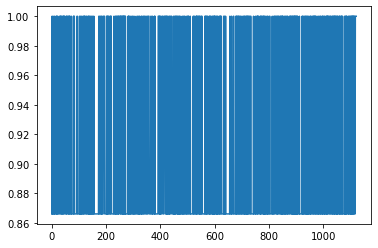

In [263]:
plt.plot(nearest_users[0])

In [259]:
cosine_similarity(test_user, df_t.iloc[:, :-1])[0]

array([0.8660254, 1.       , 0.8660254, ..., 1.       , 1.       ,
       1.       ])

In [227]:
df_t.iloc[:5,:-1]

,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,education_Secondary,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
285104,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84425,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39577,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277292,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246095,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
df_t.index[0]

285104

In [229]:
df_t.iloc[84425]

IndexError: single positional indexer is out-of-bounds

In [145]:
train_df.iloc[0,:-1]

[gender_numerical                                 1
 age_indicator_0                                  0
 age_indicator_1                                  0
 age_indicator_2                                  1
 age_indicator_4                                  0
 education_Bachelor's                             0
 education_Doctorate                              0
 education_Less than Secondary                    0
 education_Master's                               0
 education_Secondary                              1
 region_Australia                                 0
 region_Bangladesh                                0
 region_Brazil                                    0
 region_Canada                                    0
 region_China                                     0
 region_Colombia                                  0
 region_Egypt                                     0
 region_France                                    0
 region_Germany                                   0
 region_Gree

In [125]:
# Isolate cluster in training data
train_df[train_df["clusters"]==2]


,gender_numerical,age_indicator_0,age_indicator_1,age_indicator_2,age_indicator_4,education_Bachelor's,education_Doctorate,education_Less than Secondary,education_Master's,education_Secondary,...,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other,clusters
358287,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
132402,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
184993,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
118654,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
123948,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
351628,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
238270,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
34161,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
# Check distance of test case to cluster centre:
# https://stackoverflow.com/questions/54240144/distance-between-nodes-and-the-centroid-in-a-kmeans-cluster

In [ ]:
# 1) use k parameter to generate cluster lables
# 2) add cluster labels to dataset

In [345]:
df.columns

Index(['Id', 'institute', 'course_id', 'userid_DI', 'certified',
       'final_cc_cname_DI', 'LoE_DI', 'age', 'gender_numerical',
       'age_indicator', 'age_indicator_0', 'age_indicator_1',
       'age_indicator_2', 'age_indicator_4', 'education_Bachelor's',
       'education_Doctorate', 'education_Less than Secondary',
       'education_Master's', 'education_Secondary', 'region_Australia',
       'region_Bangladesh', 'region_Brazil', 'region_Canada', 'region_China',
       'region_Colombia', 'region_Egypt', 'region_France', 'region_Germany',
       'region_Greece', 'region_India', 'region_Indonesia', 'region_Japan',
       'region_Mexico', 'region_Morocco', 'region_Nigeria',
       'region_Other Africa', 'region_Other East Asia', 'region_Other Europe',
       'region_Other Middle East/Central Asia',
       'region_Other North & Central Amer., Caribbean', 'region_Other Oceania',
       'region_Other South America', 'region_Other South Asia',
       'region_Pakistan', 'region_Philippi

In [378]:
df["course_id"].unique()

'PH207x'

In [608]:
# create pivot
pt = pd.pivot_table(train_df_o, index=["userid_DI"], columns="course_id", values="certified", aggfunc="sum")
                                                                # , "Id"
pt

course_id,14.73x,2.01x,3.091x,6.002x,6.00x,7.00x,8.02x,8.MReV,CB22x,CS50x,ER22x,PH207x,PH278x
userid_DI,,,,,,,,,,,,,
MHxPC130000002,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MHxPC130000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
MHxPC130000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
MHxPC130000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
MHxPC130000008,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MHxPC130597670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
MHxPC130597671,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MHxPC130597672,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [410]:
df_o[df_o["userid_DI"]=="MHxPC130134995"]

,Id,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
174,415,HarvardX,CB22x,2024,Spring,MHxPC130134995,0,0,0,Japan,...,0.0,4/12/2024,4/12/2024,2,1,197757,0,0,0,27
175,416,HarvardX,CS50x,2023,Summer,MHxPC130134995,1,1,1,Japan,...,1.0,8/20/2023,5/21/2024,92,29,197757,9,0,0,25
176,417,HarvardX,ER22x,2024,Spring,MHxPC130134995,1,0,0,Japan,...,0.0,3/18/2024,4/12/2024,43,3,197757,2,0,0,26
177,418,HarvardX,PH278x,2024,Spring,MHxPC130134995,0,0,0,Japan,...,0.0,4/12/2024,4/12/2024,1,1,197757,0,0,0,26
177160,319291,MITx,14.73x,2024,Spring,MHxPC130134995,0,0,0,Japan,...,0.0,4/12/2024,4/12/2024,3,3,197757,0,0,0,27
177161,319292,MITx,7.00x,2024,Spring,MHxPC130134995,0,0,0,Japan,...,0.0,4/12/2024,4/12/2024,1,3,197757,0,0,0,25
177162,319293,MITx,8.02x,2024,Spring,MHxPC130134995,1,0,0,Japan,...,0.0,2/18/2024,3/18/2024,36,3,4,3,0,0,23


In [412]:
df[df["userid_DI"]=="MHxPC130134995"]

,Id,institute,course_id,userid_DI,certified,final_cc_cname_DI,LoE_DI,age,gender_numerical,age_indicator,...,region_Pakistan,region_Philippines,region_Poland,region_Portugal,region_Russian Federation,region_Spain,region_Ukraine,region_United Kingdom,region_United States,region_Unknown/Other
